In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("new.root","READ")
ds = rfile["tree"]

7000


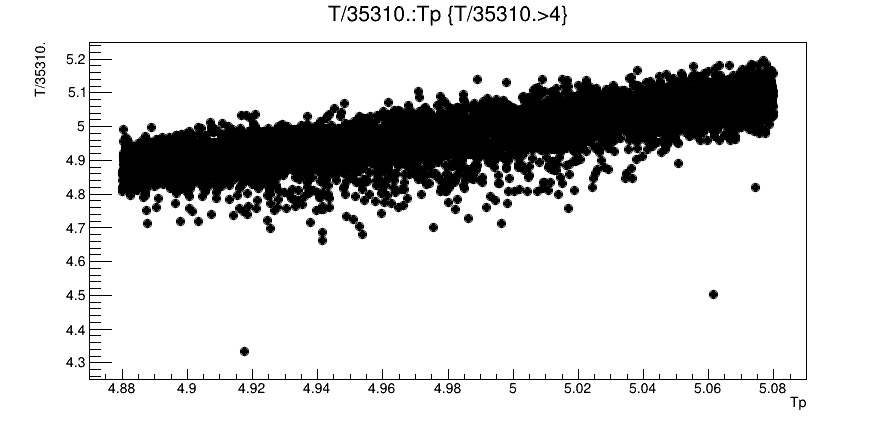

In [3]:
ds.draw("T/35310.:Tp","T/35310.>4")
print(ds.GetEntries())
canv.Draw()

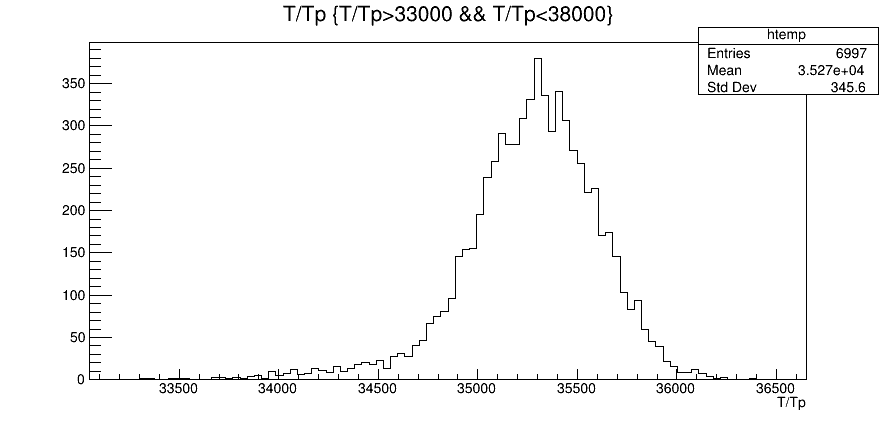

In [4]:
ds.Draw("T/Tp","T/Tp>33000 && T/Tp<38000")
canv.Draw()

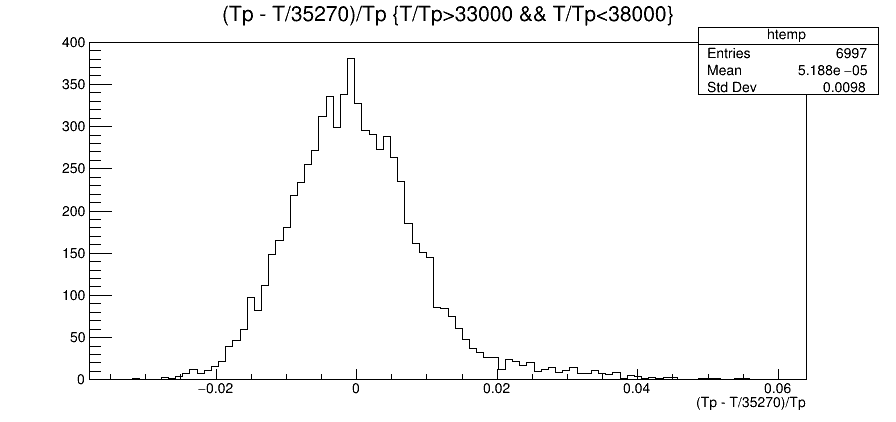

In [5]:
ds.Draw("(Tp - T/35270)/Tp","T/Tp>33000 && T/Tp<38000")
canv.Draw()

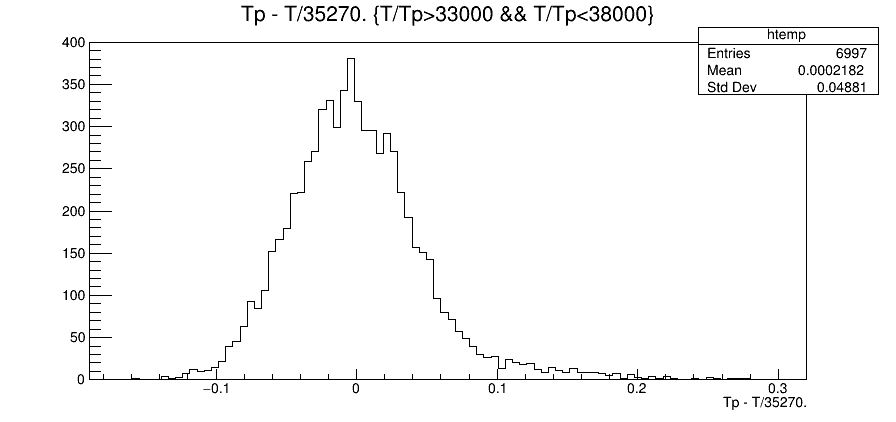

In [6]:
ds.Draw("Tp - T/35270.","T/Tp>33000 && T/Tp<38000")
canv.Draw()

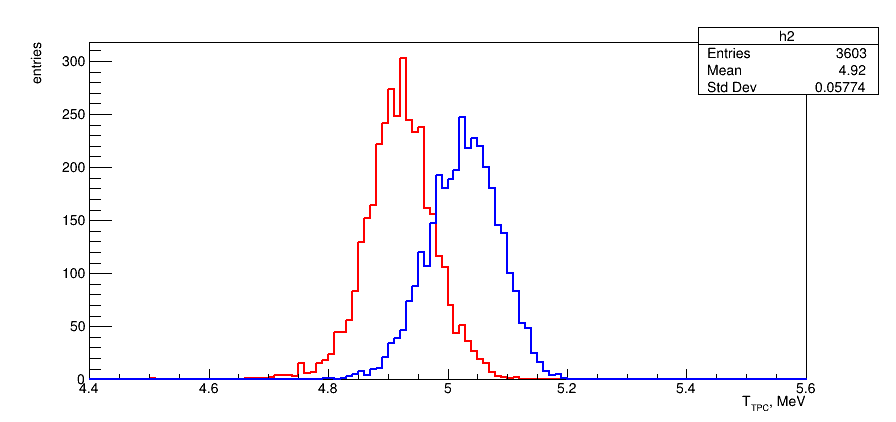

In [7]:
h2 = ROOT.TH1F("h2",";T_{TPC}, MeV;entries",120,4.4,5.6)
h2.SetLineColor(2)
h2.SetLineWidth(2)
h3 = ROOT.TH1F("h3",";T_{TPC}, MeV;entries",120,4.4,5.6)
h3.SetLineColor(4)
h3.SetLineWidth(2)
ds.Draw("(T/35310.)>>h2","energy3<100")
ds.Draw("(T/35310.)>>h3","energy3>100")
h2.Draw("hist")
h3.Draw("hist same")
canv.Draw()

( 4.97526 +- 0.00103961 )
 FCN=10.5131 FROM MIGRAD    STATUS=CONVERGED      98 CALLS          99 TOTAL
                     EDM=1.10411e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.97526e+00   1.03961e-03   2.37239e-06  -6.06990e-03
   2  p1          -1.44552e+01   4.25850e-01   7.00784e-04  -2.99210e-05


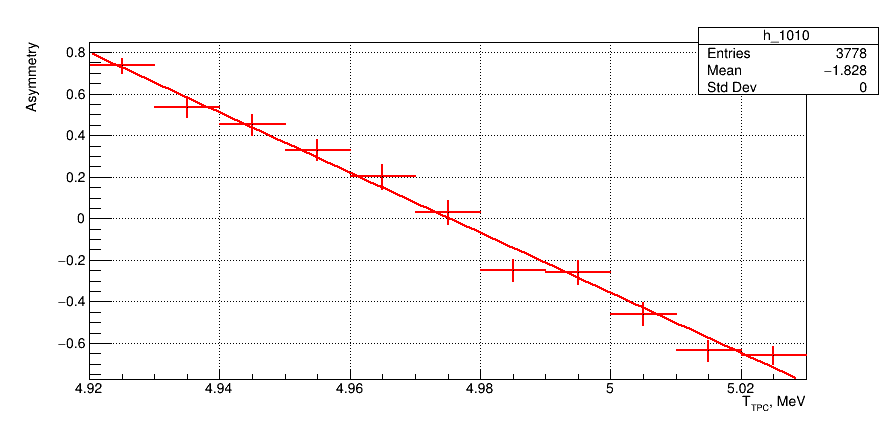

In [8]:
ha = h2.asym(h3)
ha.GetXaxis().SetRangeUser(4.925,5.025)
ha.GetYaxis().SetTitle("Asymmetry")
fa = ROOT.TF1("fa","(x-[0])*[1]",4.925,5.025)
fa.SetParameter(0,4.97)
ha.Fit(fa)
ha.Draw()
ROOT.gPad.SetGridx()
ROOT.gPad.SetGridy()
T23 = VE(fa.GetParameter(0),fa.GetParError(0)**2)
print(T23)
canv.Draw()

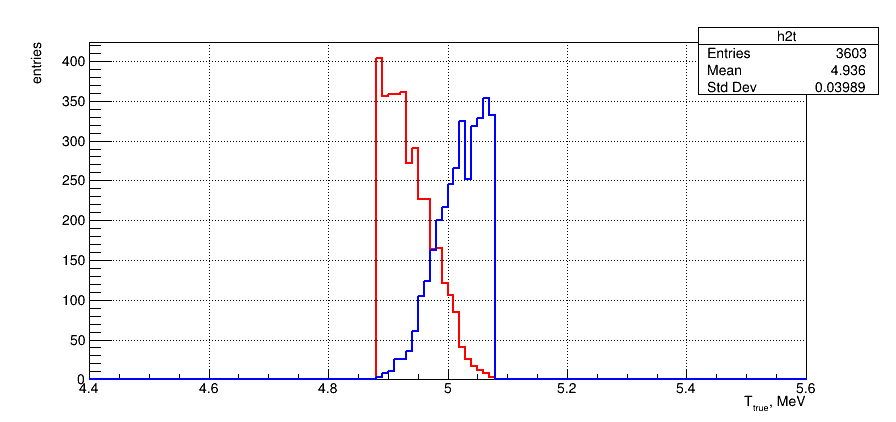

In [9]:
h2t = ROOT.TH1F("h2t",";T_{true}, MeV;entries",120,4.4,5.6)
h2t.SetLineColor(2)
h2t.SetLineWidth(2)
h3t = ROOT.TH1F("h3t",";T_{true}, MeV;entries",120,4.4,5.6)
h3t.SetLineColor(4)
h3t.SetLineWidth(2)
ds.Draw("Tp>>h2t","energy3<100")
ds.Draw("Tp>>h3t","energy3>100")
h2t.Draw("hist")
h3t.Draw("hist same")
canv.Draw()

( 4.9797 +- 0.000790477 )
 FCN=13.5354 FROM MIGRAD    STATUS=CONVERGED     102 CALLS         103 TOTAL
                     EDM=1.52606e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.97970e+00   7.90477e-04   2.37450e-06  -1.67142e-04
   2  p1          -1.64378e+01   3.32174e-01   5.88127e-04  -2.42512e-07


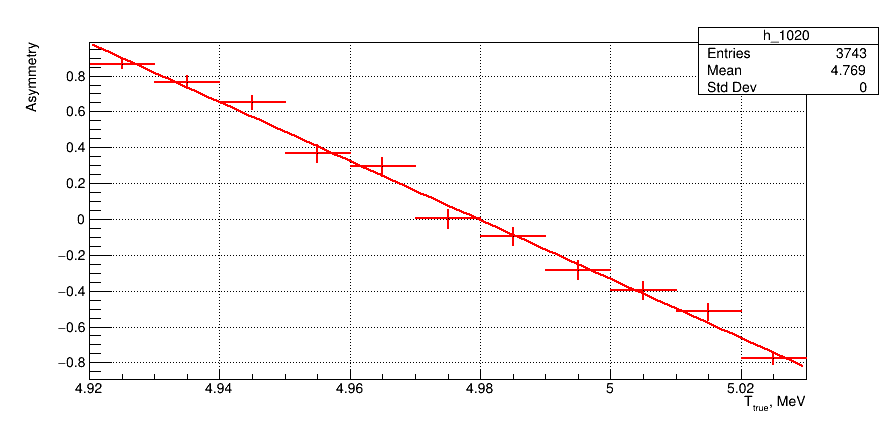

In [10]:
hat = h2t.asym(h3t)
hat.GetXaxis().SetRangeUser(4.925,5.025)
hat.GetYaxis().SetTitle("Asymmetry")
fat = ROOT.TF1("fa","(x-[0])*[1]",4.925,5.025)
fat.SetParameter(0,4.97)
hat.Fit(fat)
hat.Draw()
ROOT.gPad.SetGridx()
ROOT.gPad.SetGridy()
T23t = VE(fat.GetParameter(0),fat.GetParError(0)**2)
print(T23t)
canv.Draw()

In [11]:
print("True T23 (7000 ev) = " + str(T23t) + "\t\t" + str(1e4*T23t.prec().value() ) )
print("TPC  T23 (7000 ev) = " + str(T23 ) + "\t\t" + str(1e4*T23 .prec().value() ) )
print( " (True - TPC)  : " + str( (T23.value()-T23t.value())*1000  ) + " keV" )
print( " Deviation     : " + str((T23.value()-T23t.value())/T23.error()) + " sigma")

True T23 (7000 ev) = ( 4.9797 +- 0.000790477 )		1.587399511583226
TPC  T23 (7000 ev) = ( 4.97526 +- 0.00103961 )		2.089551994988677
 (True - TPC)  : -4.432345552027428 keV
 Deviation     : -4.2634812025899445 sigma



****************************************
Minimizer is Linear / Migrad
Chi2                      =      270.535
NDf                       =          198
p0                        =      139.892   +/-   35.7232     
p1                        =     -21.3343   +/-   7.16988     


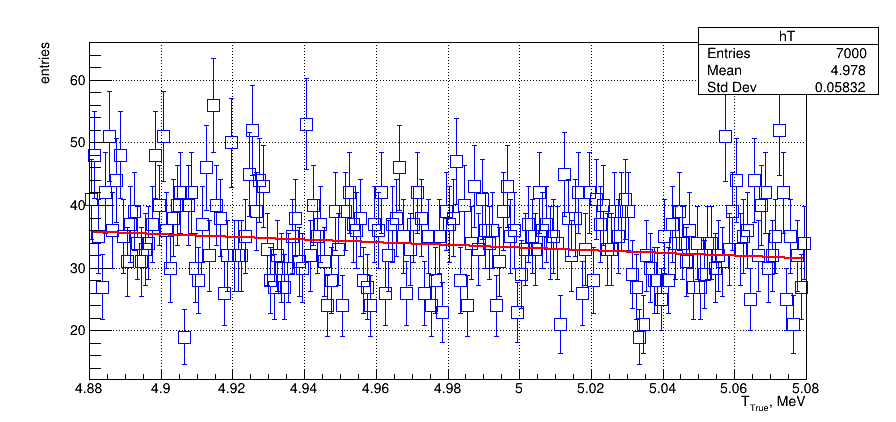

In [12]:
hT = ROOT.TH1F("hT",";T_{True}, MeV;entries",200,4.980-0.100,4.980+0.100)
ds.draw("Tp>>hT","Tp>(4.980-0.1) && Tp<(4.980+0.1)")
hT.blue()
hT.Draw("e1")
hT.Fit("pol1")
canv.Draw()

In [13]:
Lga = 10.
W1  = 0.0040
W2  = 0.0075
def zREC( start ):
    return ( start*W1+W2*Lga )

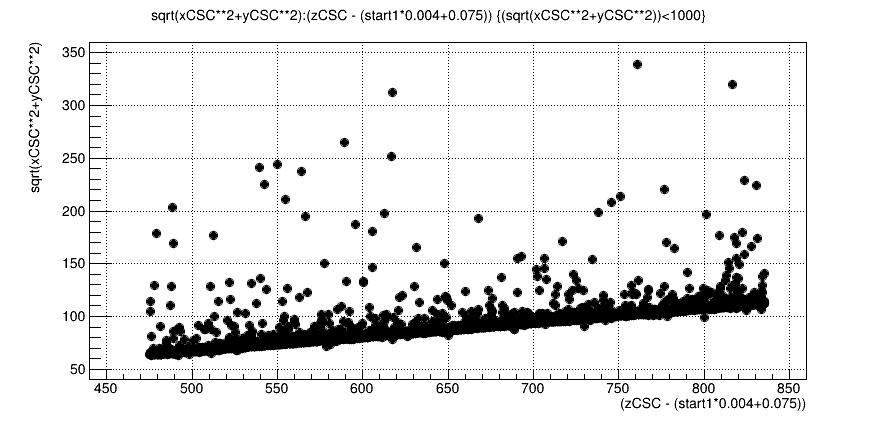

In [14]:
#ds.Draw("start1*0.004+0.075","T/Tp>33000 && T/Tp<38000")
ds.Draw("sqrt(xCSC**2+yCSC**2):(zCSC - (start1*0.004+0.075))","(sqrt(xCSC**2+yCSC**2))<1000")
canv.Draw()

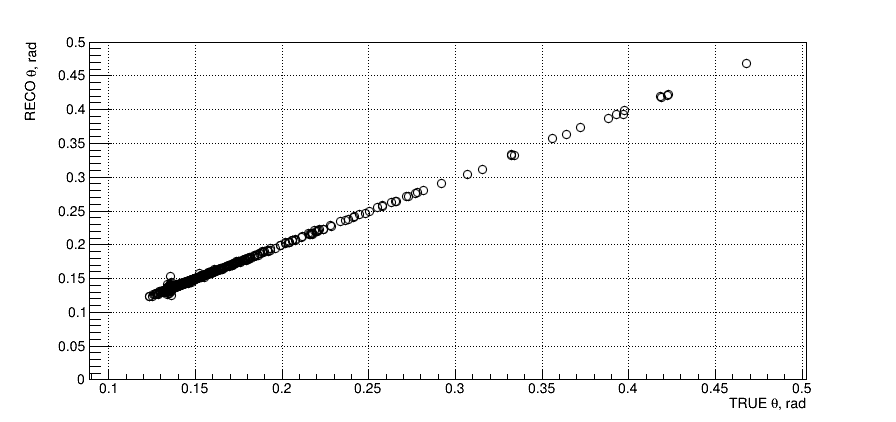

In [15]:
theta_reco_list = []
z_reco_list = []
theta_true_list = []
from math import atan, sqrt
ii=0
for ev in ds:
    theta_true_list.append( ev.THETAe )
    lCSC    = sqrt( ev.xCSC**2 + ev.yCSC**2 )
    delta_Z = ev.zCSC - ( ev.start1*W1+W2*Lga )
    z_reco_list.append( ev.start1*W1+W2*Lga )
    angle = atan( lCSC / delta_Z )
#    angle = lCSC / delta_Z 
    theta_reco_list.append( angle )
#    if not ii%1000:
#        print(ev.yCSC)
#    ii+=1
gt = makeGraph( theta_true_list, theta_reco_list )
gt.SetMarkerStyle(24)
gt.SetTitle("")
gt.GetXaxis().SetTitle("TRUE #theta, rad")
gt.GetYaxis().SetTitle("RECO #theta, rad")
gt.GetYaxis().SetRangeUser(0,0.5)
gt.Draw("AP")
canv.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =  1.60931e+06
NDf                       =         6998
p0                        =    -0.452753   +/-   0.393971    
p1                        =  0.000666934   +/-   0.00176441  


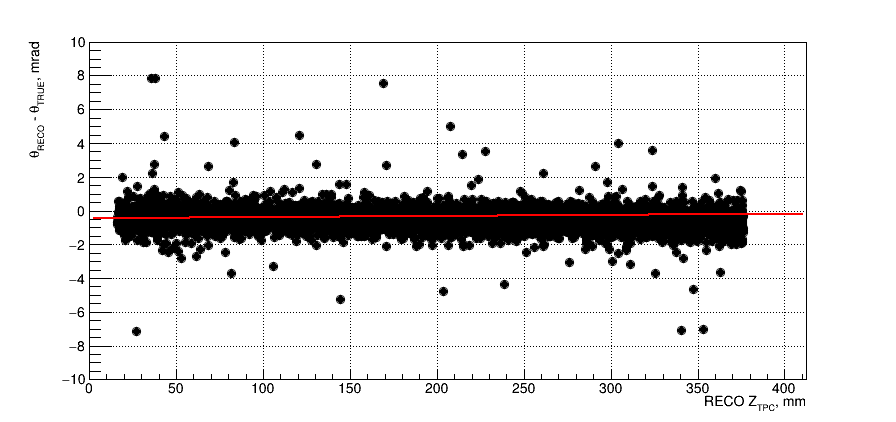

In [16]:
theta_miss_list = []
for idx in range(len(theta_true_list)):
    theta_miss_list.append( 1000.*(theta_reco_list[idx] - theta_true_list[idx]) )
gt = makeGraph( z_reco_list, theta_miss_list )
gt.SetMarkerStyle(20)
gt.SetTitle("")
gt.GetXaxis().SetTitle("RECO Z_{TPC}, mm")
gt.GetYaxis().SetTitle("#theta_{RECO} - #theta_{TRUE}, mrad")
gt.GetYaxis().SetRangeUser(-10,10.)
gt.Fit("pol1")
gt.Draw("AP")
canv.Draw()

Mean = 3.952688527738441
 FCN=204.263 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=4.05596e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.89652e+02   2.92423e+00   1.60973e-02  -2.83264e-05
   2  Mean         3.96465e+00   1.74365e-03   1.21741e-05   1.42321e-02
   3  Sigma        1.42974e-01   1.36846e-03   1.44145e-05   2.85952e-03


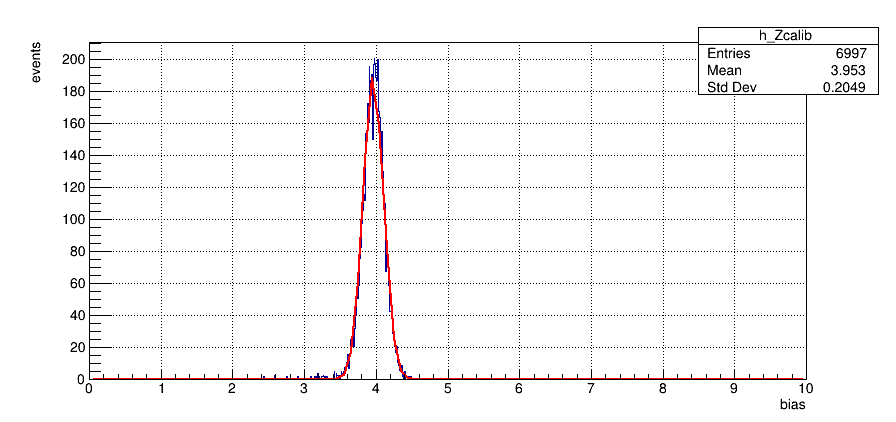

In [17]:
h_Zcalib = ROOT.TH1F("h_Zcalib",";bias;events",1000,0,10)
ds.Draw("(zpos - start1*0.004)>>h_Zcalib","(zpos - start1*0.004)<10")
h_Zcalib.Fit("gaus")
h_Zcalib.Draw()
z_bias = h_Zcalib.mean().value()
print("Mean = " + str(z_bias))
canv.Draw()

Z bias (anode)     : ( 3.91971 +- 0.00494792 ) mm
Z bias (cathode)   : ( 3.9816 +- 0.00561358 ) mm


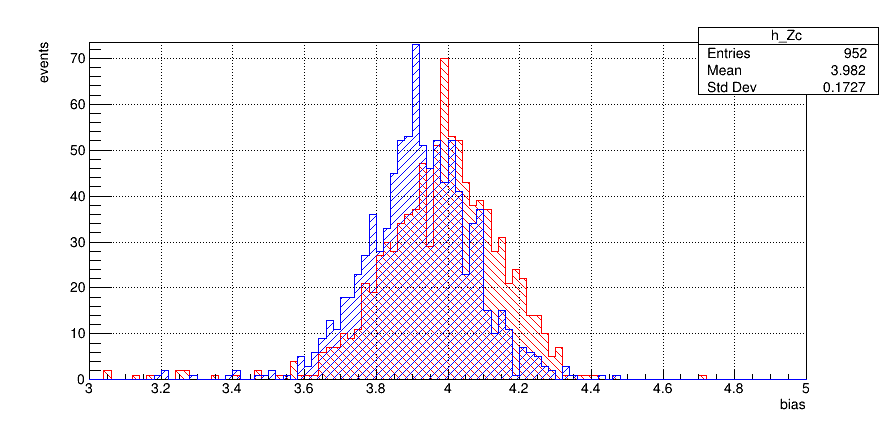

In [18]:
h_Za = ROOT.TH1F("h_Za",";bias;events",100,3,5)
h_Zc = ROOT.TH1F("h_Zc",";bias;events",100,3,5)
h_Za.blue()
h_Zc.red()
h_Za.SetFillColor(4)
h_Za.SetFillStyle(3004)
h_Zc.SetFillColor(2)
h_Zc.SetFillStyle(3005)
ds.Draw("(zpos - start1*0.004)>>h_Za","(zpos - start1*0.004)<10 && zpos<70")
ds.Draw("(zpos - start1*0.004)>>h_Zc","(zpos - start1*0.004)<10 && zpos>330")
h_Zc.Draw("hist")
h_Za.Draw("hist same")
print( "Z bias (anode)     : " + str(h_Za.mean()) + " mm" )
print( "Z bias (cathode)   : " + str(h_Zc.mean()) + " mm" )
#print( "B_cathode - B_anode: " + str(h_cathode.mean()-h_anode.mean())  + " mm" )
canv.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      16.3526
NDf                       =            8
p0                        =     -2.17559   +/-   0.00213569  


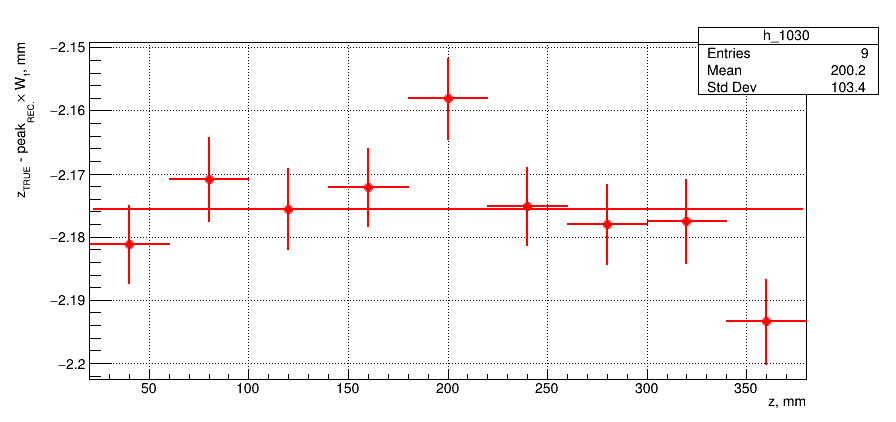

In [19]:
#ds.Draw("(zpos - start1*0.004):zpos","(zpos - start1*0.004)>3.5 && (zpos - start1*0.004)<4.5")
#ds.Draw("(zpos - peak1*0.004):zpos","(zpos - peak1*0.004)>-2.7 && (zpos - peak1*0.004)<-1.7")
h_start = ROOT.TH1F("h_start",";bias start, mm;events",100,3.5,4.5)
h_peak  = ROOT.TH1F("h_peak" ,";bias peak, mm;events",100,-2.7,-1.7)
zpos_bins = []
for reg in range(10):
    zpos_bins.append(20.+40.*reg)
h_PEAK  = h1_axis(zpos_bins).red()
h_START = h1_axis(zpos_bins).blue()
for reg in range(9):
    z_min = 20.+40.*reg
    z_max = 20.+40.*(reg+1)
    z_cut = " && zpos>" + str(z_min) + " && zpos<" + str(z_max)
    cut_peak  = "(zpos - peak1*0.004)>-2.7 && (zpos - peak1*0.004)<-1.7" + z_cut
    cut_start = "(zpos - start1*0.004)>3.5 && (zpos - start1*0.004)<4.5" + z_cut
    h_start.Reset()
    h_peak.Reset()
    ds.Draw( "(zpos - start1*0.004)>>h_start", cut_start)
    ds.Draw( "(zpos - peak1*0.004)>>h_peak", cut_peak)
    #print(h_peak.stat())
    h_PEAK[reg+1] = VE( h_peak.mean().value(), h_peak.mean().error()**2 )
    h_START[reg+1] = VE( h_start.mean().value(), h_start.mean().error()**2 )
h_PEAK.SetLineWidth(2)
h_PEAK.SetTitle(" ")
h_PEAK.GetXaxis().SetTitle("z, mm")
h_PEAK.GetYaxis().SetTitle("z_{TRUE} - peak_{REC.}#times W_{1}, mm")
#h_PEAK.GetYaxis().SetRangeUser(0,0.7)
h_PEAK.Draw()
h_PEAK.Fit("pol0")
canv.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      181.431
NDf                       =            8
p0                        =       3.9635   +/-   0.00171696  


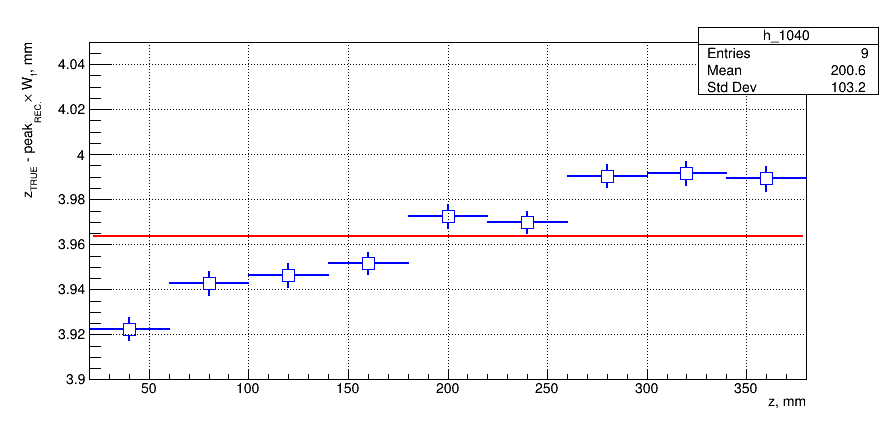

In [20]:
h_START.SetLineWidth(2)
h_START.SetTitle(" ")
h_START.GetXaxis().SetTitle("z, mm")
h_START.GetYaxis().SetTitle("z_{TRUE} - peak_{REC.}#times W_{1}, mm")
h_START.GetYaxis().SetRangeUser(3.9,4.05)
h_START.Draw()
h_START.Fit("pol0")
canv.Draw()

Bias (peak) = -2.196397696300809
 FCN=304.196 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=4.97085e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.49089e+02   2.34853e+00   1.55979e-02   3.30199e-06
   2  Mean        -2.17316e+00   2.20920e-03   1.87000e-05   4.69624e-03
   3  Sigma        1.78024e-01   1.77294e-03   1.69156e-05   1.38072e-02


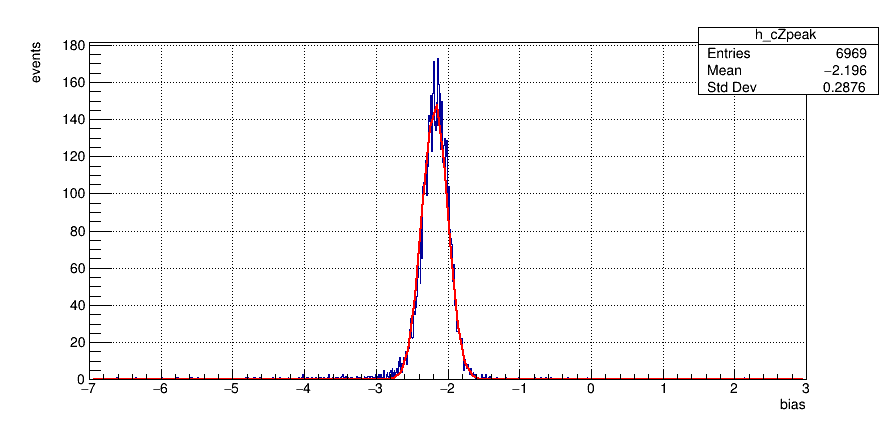

In [21]:
h_cZpeak = ROOT.TH1F("h_cZpeak",";bias;events",1000,-7,3)
ds.Draw("(zpos - peak1*0.004)>>h_cZpeak","(zpos - peak1*0.004)<3")
h_cZpeak.Fit("gaus")
h_cZpeak.Draw()
z_bias_peak = h_cZpeak.mean().value()
print("Bias (peak) = " + str(z_bias_peak))
canv.Draw()

Angular bias (anode)   : ( 0.270028 +- 0.017476 ) mrad
Angular bias (center)  : ( 0.307164 +- 0.0154541 ) mrad
Angular bias (cathode) : ( 0.397239 +- 0.0179554 ) mrad
Difference             : ( -0.127211 +- 0.0250561 ) mrad


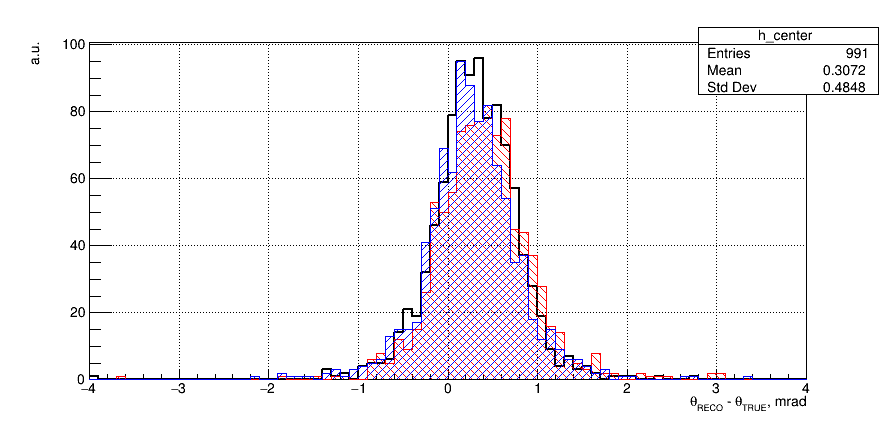

In [22]:
h_center  = ROOT.TH1F("h_center" ,";#theta_{RECO} - #theta_{TRUE}, mrad;a.u.",80,-4,4)
h_anode   = ROOT.TH1F("h_anode"  ,";#theta_{RECO} - #theta_{TRUE}, mrad;a.u.",80,-4,4)
h_cathode = ROOT.TH1F("h_cathode",";#theta_{RECO} - #theta_{TRUE}, mrad;a.u.",80,-4,4)
h_anode.SetLineColor(4)
h_anode.SetFillColor(4)
h_anode.SetFillStyle(3004)
h_center.SetLineColor(1)
h_center.SetLineWidth(2)
h_cathode.SetLineColor(2)
h_cathode.SetFillColor(2)
h_cathode.SetFillStyle(3005)
for ev in ds:
    lCSC    = sqrt( ev.xCSC**2 + ev.yCSC**2 )
    reco_Z  = ev.peak1*W1+z_bias_peak
    delta_Z = ev.zCSC - reco_Z
    angle = atan( lCSC / delta_Z )
    miss = 1000.*(angle - ev.THETAe)
    if reco_Z<70:
        h_anode.Fill(miss)
    if reco_Z>330:
        h_cathode.Fill(miss)
    if reco_Z>175 and reco_Z<225 :
        h_center.Fill(miss)
h_center.Draw("hist")
h_cathode.Draw("same hist")
h_anode.Draw("same hist")
print( "Angular bias (anode)   : " + str(h_anode.mean())                   + " mrad" )
print( "Angular bias (center)  : " + str(h_center.mean())                  + " mrad" )
print( "Angular bias (cathode) : " + str(h_cathode.mean())                 + " mrad" )
print( "Difference             : " + str(h_anode.mean()-h_cathode.mean())  + " mrad" )
canv.Draw()

 FCN=9.4799 FROM MIGRAD    STATUS=CONVERGED      37 CALLS          38 TOTAL
                     EDM=1.73604e-23    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.28942e-01   1.38398e-02   9.69464e-06  -4.58077e-10
   2  p1           4.47872e-04   6.25823e-05   7.67543e-08  -1.73576e-07

****************************************
Minimizer is Linear / Migrad
Chi2                      =      60.6959
NDf                       =            8
p0                        =     0.317731   +/-   0.00613314  


Warning in <TROOT::Append>: Replacing existing TH1: h_miss (Potential memory leak).


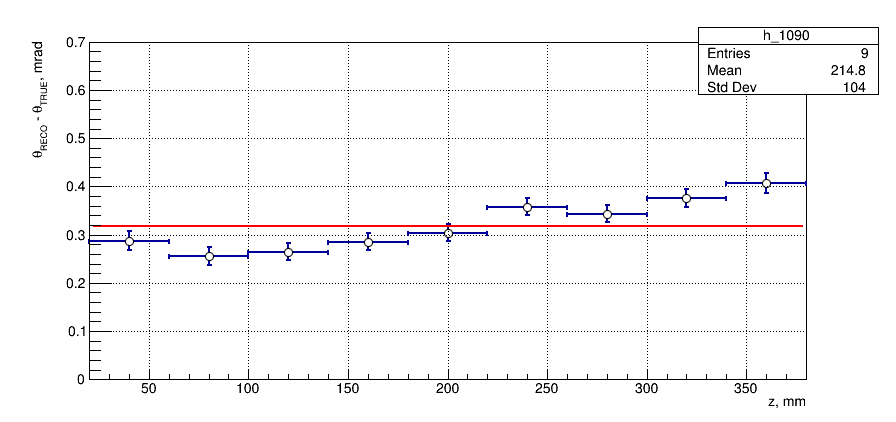

In [33]:
h_miss = ROOT.TH1F("h_miss",";#theta_{RECO} - #theta_{TRUE}, mrad",80,-4,4)
h_MISS  = h1_axis(zpos_bins)
for reg in range(9):
    z_min = 20.+40.*reg
    z_max = 20.+40.*(reg+1)
    z_cut_new = "zpos>" + str(z_min) + " && zpos<" + str(z_max)
    cut_peak  = "(zpos - peak1*0.004)>-2.7 && (zpos - peak1*0.004)<-1.7" + z_cut
    cut_start = "(zpos - start1*0.004)>3.5 && (zpos - start1*0.004)<4.5" + z_cut
    h_miss.Reset()
    for ev in ds.withCuts(z_cut_new):
        lCSC    = sqrt( ev.xCSC**2 + ev.yCSC**2 )
        reco_Z  = ev.peak1*W1+z_bias_peak
        delta_Z = ev.zCSC - reco_Z
        angle = atan( lCSC / delta_Z )
        miss = 1000.*(angle - ev.THETAe)
        h_miss.Fill(miss)
    h_MISS[reg+1] = VE( h_miss.mean().value(), h_miss.mean().error()**2 )
h_MISS.SetMarkerStyle(24)
h_MISS.SetLineWidth(2)
h_MISS.SetTitle(" ")
h_MISS.GetXaxis().SetTitle("z, mm")
h_MISS.GetYaxis().SetTitle("#theta_{RECO} - #theta_{TRUE}, mrad")
h_MISS.GetYaxis().SetRangeUser(0,0.7)
h_MISS.Draw("e1")
f_pol1 = ROOT.TF1("f_pol1","[0]+[1]*x",0,400)
h_MISS.Fit( f_pol1 )
h_MISS.Fit( "pol0" )
canv.Draw()

In [24]:
f_pol1.Eval(400)-f_pol1.Eval(0)

0.17914889417317972


****************************************
Minimizer is Linear / Migrad
Chi2                      =      6.45507
NDf                       =            8
p0                        =    0.0247146   +/-   0.00612985  


Warning in <TROOT::Append>: Replacing existing TH1: h_miss (Potential memory leak).


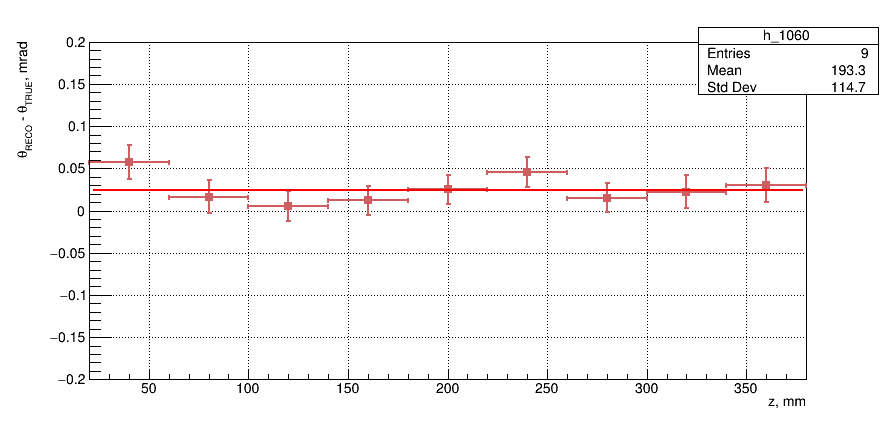

In [25]:
h_miss = ROOT.TH1F("h_miss",";#theta_{RECO} - #theta_{TRUE}, mrad",80,-4,4)
h_CORR = h1_axis(zpos_bins)
z_corr = -3.6
for reg in range(9):
    z_min = 20.+40.*reg
    z_max = 20.+40.*(reg+1)
    z_cut_new = "zpos>" + str(z_min) + " && zpos<" + str(z_max)
    cut_peak  = "(zpos - peak1*0.004)>-2.7 && (zpos - peak1*0.004)<-1.7" + z_cut
    cut_start = "(zpos - start1*0.004)>3.5 && (zpos - start1*0.004)<4.5" + z_cut
    h_miss.Reset()
    for ev in ds.withCuts(z_cut_new):
        lCSC    = sqrt( ev.xCSC**2 + ev.yCSC**2 )
        reco_Z  = ev.peak1*W1+z_corr
        delta_Z = ev.zCSC - reco_Z
        angle = atan( lCSC / delta_Z )
        miss = 1000.*(angle - ev.THETAe)
        h_miss.Fill(miss)
    h_CORR[reg+1] = VE( h_miss.mean().value(), h_miss.mean().error()**2 )
h_CORR.SetMarkerStyle(21)
h_CORR.SetMarkerColor(46)
h_CORR.SetLineWidth(2)
h_CORR.SetLineColor(46)
h_CORR.SetTitle(" ")
h_CORR.GetXaxis().SetTitle("z, mm")
h_CORR.GetYaxis().SetTitle("#theta_{RECO} - #theta_{TRUE}, mrad")
h_CORR.GetYaxis().SetRangeUser(-0.2,0.2)
h_CORR.Draw("e1")
#f_pol2 = ROOT.TF1("f_pol2","[0]+[1]*x",0,400)
h_CORR.Fit( "pol0" )
canv.Draw()

In [47]:
zpos_bins2 = []
for reg in range(19):
    zpos_bins2.append(20.+20.*reg)
h_FIND = h1_axis(zpos_bins2)
z_lst = []
chi2_lst = []
chi2ndf_lst = []
p0_lst = []
for c in range(30):
    z_corr = -2.5+0.03*c
    h_FIND.Reset()
    for reg in range(18):
        z_min = 20.+20.*reg
        z_max = 20.+20.*(reg+1)
        z_cut_new = "zpos>" + str(z_min) + " && zpos<" + str(z_max)
        cut_peak  = "(zpos - peak1*0.004)>-2.7 && (zpos - peak1*0.004)<-1.7" + z_cut
        cut_start = "(zpos - start1*0.004)>3.5 && (zpos - start1*0.004)<4.5" + z_cut
        h_miss.Reset()
        for ev in ds.withCuts(z_cut_new):
            lCSC    = sqrt( ev.xCSC**2 + ev.yCSC**2 )
            reco_Z  = ev.peak1*W1+z_corr
            delta_Z = 853.1 - reco_Z
            angle = atan( lCSC / delta_Z )
            miss = 1000.*(angle - ev.THETAe)
            h_miss.Fill(miss)
        h_FIND[reg+1] = VE( h_miss.mean().value(), h_miss.mean().error()**2 )
    res = h_FIND.Fit( "pol0", "S" )
    z_lst.append(z_corr)
    #print(res.Chi2())
    chi2ndf_lst.append( res.Chi2() / res.Ndf())
    chi2_lst.append( res.Chi2() )
    p0_lst.append( res[0].value() )


****************************************
Minimizer is Linear / Migrad
Chi2                      =      16.2522
NDf                       =           17
p0                        =   -0.0602899   +/-   0.00611204  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      15.5813
NDf                       =           17
p0                        =   -0.0539444   +/-   0.00611347  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      14.9644
NDf                       =           17
p0                        =   -0.0475984   +/-   0.00611489  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      13.6503
NDf                       =           17
p0                        =   -0.0415575   +/-   0.0060892   

****************************************
Minimizer is Linear / Migrad
Chi2                      =      13.1389
NDf                       = 

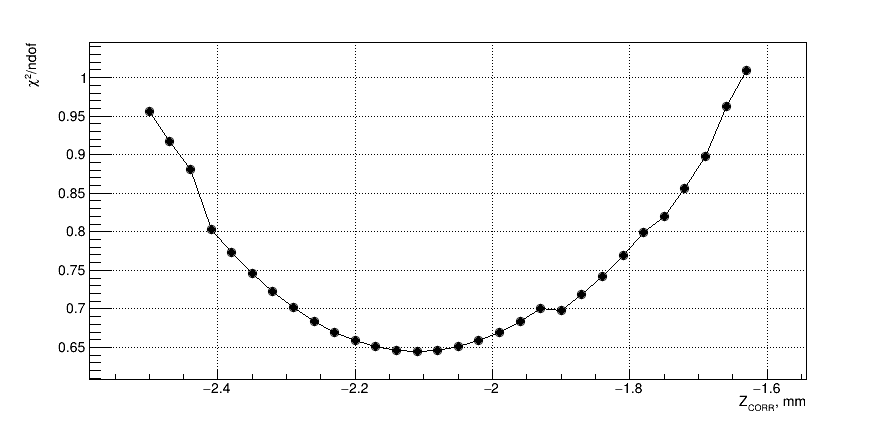

In [48]:
gr_chi2ndf = makeGraph(z_lst,chi2ndf_lst)
gr_chi2ndf.SetTitle("")
gr_chi2ndf.GetXaxis().SetTitle("Z_{CORR}, mm")
gr_chi2ndf.GetYaxis().SetTitle("#chi^{2}/ndof")
gr_chi2ndf.SetMarkerStyle(20)
gr_chi2ndf.Draw("APL")
canv.Draw()

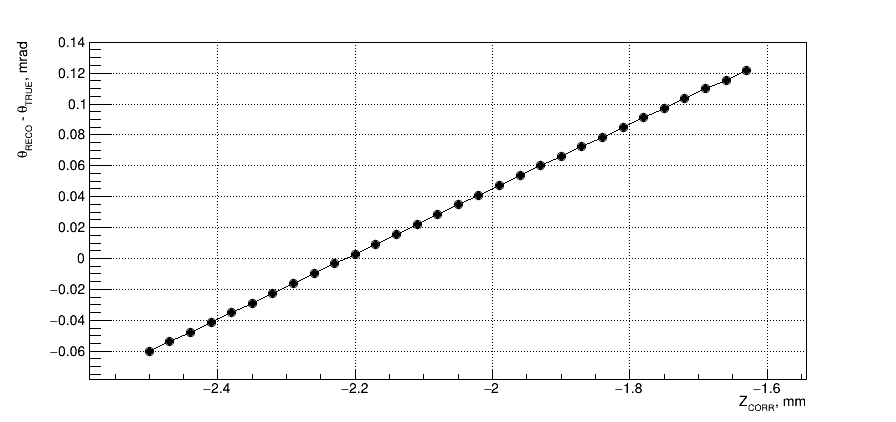

In [49]:
gr_p0 = makeGraph(z_lst,p0_lst)
gr_p0.SetTitle("")
gr_p0.GetXaxis().SetTitle("Z_{CORR}, mm")
gr_p0.GetYaxis().SetTitle("#theta_{RECO} - #theta_{TRUE}, mrad")
gr_p0.SetMarkerStyle(20)
gr_p0.Draw("APL")
canv.Draw()

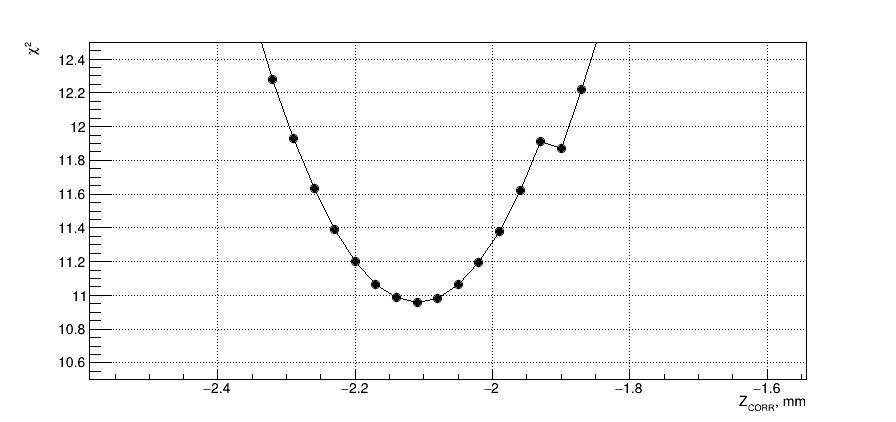

In [50]:
gr_chi2 = makeGraph(z_lst,chi2_lst)
gr_chi2.SetTitle("")
gr_chi2.GetXaxis().SetTitle("Z_{CORR}, mm")
gr_chi2.GetYaxis().SetTitle("#chi^{2}")
gr_chi2.GetYaxis().SetRangeUser(10.5,12.5)
gr_chi2.SetMarkerStyle(20)
gr_chi2.Draw("APL")
canv.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      6.60481
NDf                       =            8
p0                        =   0.00801696   +/-   0.00612577  


Warning in <TROOT::Append>: Replacing existing TH1: h_Miss (Potential memory leak).


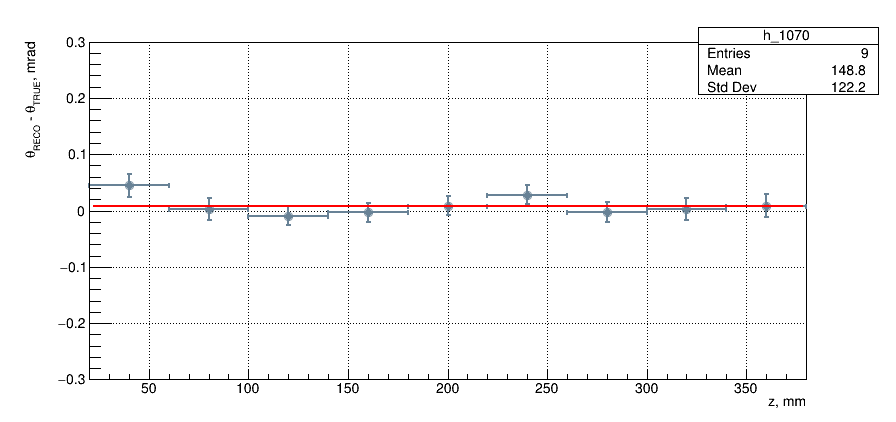

In [51]:
t_shift       = 3044.71
W_CathodeGrid = 0.004
L_GridAnode   = 10.
h_Miss = ROOT.TH1F("h_Miss",";#theta_{RECO} - #theta_{TRUE}, mrad",80,-4,4)
h_CALB = h1_axis(zpos_bins)
for reg in range(9):
    z_min = 20.+40.*reg
    z_max = 20.+40.*(reg+1)
    z_cut_new  = "zpos>" + str(z_min) + " && zpos<" + str(z_max)
    z_cut_new += " && Tp>4.88+0.0 && Tp<5.08-0.0"
    h_Miss.Reset()
    for ev in ds.withCuts(z_cut_new):
        lCSC    = sqrt( ev.xCSC**2 + ev.yCSC**2 )
        reco_Z  = L_GridAnode+(ev.peak1-t_shift)*W_CathodeGrid
#        delta_Z = ev.zCSC - reco_Z
        delta_Z = 853.1 - reco_Z
        angle = atan( lCSC / delta_Z )
        miss = 1000.*(angle - ev.THETAe)
        h_Miss.Fill(miss)
    h_CALB[reg+1] = VE( h_Miss.mean().value(), h_Miss.mean().error()**2 )
h_CALB.SetMarkerStyle(20)
h_CALB.SetMarkerColor(36)
h_CALB.SetLineWidth(2)
h_CALB.SetLineColor(36)
h_CALB.SetTitle(" ")
h_CALB.GetXaxis().SetTitle("z, mm")
h_CALB.GetYaxis().SetTitle("#theta_{RECO} - #theta_{TRUE}, mrad")
h_CALB.GetYaxis().SetRangeUser(-0.3,0.3)
h_CALB.Draw("e1")
#f_pol2 = ROOT.TF1("f_pol2","[0]+[1]*x",0,400)
h_CALB.Fit( "pol0" )
canv.Draw()

In [48]:
0.004*600.*6.9/5

3.312

In [47]:
0.004*800

3.2

In [53]:
5.7*600./10000./0.004


85.5

In [87]:
6.9*3.14159/180./0.004

30.10690416666667

In [90]:
3.14159*5./180/0.004

21.816597222222224